In [1]:
import spacy, pandas, numpy, string
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# LOAD DATA
def load_data(path):
    
    data_raw = open(path + '_distr.csv', encoding = 'utf-8').read()
    data_list = data_raw.split('\n')
    input_table = [row.split(';') for row in data_list]
    
#    print('data load from ' + path + ' is done')
    return input_table  

In [3]:
# EXTRACT TRANSCRIPTION ID's, DOMINANT TOPIC, TOPIC DISTRIBUTION AS VECTOR 
def extract_data(input_table):
    
    work_table = []
    for i in range(1, len(input_table)-1):    
        topic_vector = []
        for j in range(13, len(input_table[i])-1):
            topic_vector.append(float(input_table[i][j].replace('"', '')))
        work_table.append([input_table[i][0], input_table[i][1], input_table[i][len(input_table[i])-1], topic_vector])   

#    print('data extraction done')
    return work_table

In [4]:
# GROUP TRANSCRIPTIONS BY DOMINANT TOPIC
def create_clusters(work_table):  
    
    # CREATE AGGREGATION LEVELS
    topics = []
    for i in range(0, len(work_table)-1):
        if work_table[i][2] not in topics:
            topics.append(work_table[i][2])

    clusters = [[dominant_topic, []] for dominant_topic in topics]
   
    # SPLIT INTO CLUSTERS
    for i in range(0, len(work_table)-1):
        for j in range (0, len(clusters)):
            if (clusters[j][0] == work_table[i][2]):
                clusters[j][1].append(numpy.asarray(work_table[i][3]))

#    print('clusters done')
    return clusters

In [5]:
# EXTRACT TERMS AND WEIGHTS PER TOPIC
# TERMS_ONLY EXAMPLE: [['danken', 'fallen', 'dienstag', 'frank', 'bitten'], ['warten', 'dürfen', 'abend', 'woche', 'tagen'], ['kennen', 'spielen', 'lernen', 'easy', 'echt']]
# TERMS_WITH_WEIGHT EXAMPLE: [{'danken': '86.285', 'fallen': '78.262', 'dienstag': '68.248', 'frank': '62.249', 'bitten': '57.422'}, {'warten': '85.251', ...]
def extract_topics(path_topics):

    # LOAD
    topics_raw = open(path_topics + '_topics.csv', encoding = 'latin-1').read()
    topics_list = topics_raw.split('\n')
    topics_table = [topic.replace('(', ',').replace(')', ',').replace(' ', '').split(',') for topic in topics_list]
    
    topics_cleaned = []
    for topic in topics_table:
        cleaned = []
        for i in range(1, len(topic)):
            if (topic[i] != ''):
                cleaned.append(topic[i])
        topics_cleaned.append(cleaned)

    # EXTRACT
    terms_only = []
    terms_with_weight = []
    for i in range(0, len(topics_cleaned)-1):
        term_weight_dict = {}
        terms = []
        for j in range (0, len(topics_cleaned[i])-1):
            if j % 2 == 0:
                terms.append(topics_cleaned[i][j])
                term_weight_dict[topics_cleaned[i][j]] = float(topics_cleaned[i][j + 1])
        terms_only.append(terms)
        terms_with_weight.append(term_weight_dict)
        
#    print('topic extraction done')
    return terms_only, terms_with_weight

In [6]:
# ELBOW METHOD USING COSINE SIMILARITY
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
def calculate_cosine (clusters):  
    
    # MEASURE COSINE SIMILARITY
    avg = []
    for c in range(0, len(clusters)):
        vectors = numpy.asarray(clusters[c][1])
        cs = cosine_similarity(vectors)
        avg.append(numpy.average(cs))
        
    # CALCULATE MODEL AVERAGE
    average = numpy.average(numpy.asarray(avg))
    
#    print('cosine similarity calculated')
    return average

In [7]:
# CALCULATE SEMANTIC COHERENCE
# Source: Mimno et al. 2011
def calculate_coherence(work_table, work_topics):

    #COUNT HOW MANY TIMES EACH WORD PAIR / TOPIC OCCUR TOGETHER IN DOCUMENTS
    avg = []
    for topic in range(0, len(work_topics)): 
        coherence = 0
        for m in range(0, len(work_topics[0])-1):   
            co_doc_frequency = 0     
            for l in range (m + 1, len(work_topics[0])):
                term2_frequency = 0.01
                for row in range(0, len(work_table)):
                    if (work_topics[topic][l] in work_table[row][1]):
                        term2_frequency += 1
                    if (work_topics[topic][m] in work_table[row][1] and work_topics[topic][l] in work_table[row][1]):
                        co_doc_frequency += 1
            coherence += numpy.log((co_doc_frequency + 1) / term2_frequency)
        avg.append(coherence) 

    # CALCULATE MODEL AVERAGE
    average = numpy.average(numpy.asarray(avg))

#    print('coherence calculated')  
    return average

In [8]:
# CALCULATE EXCLUSIVITY
def calculate_exclusivity(terms_with_weight):

    # CALCULATE TERM WEIGHT IN A TOPIC COMPARED TO TERM WEIGHT IN ALL TOPICS
    avg = []
    for topic in terms_with_weight:
        exclusivity = 0.00
        for term, weight in topic.items():
            term_weight_in_all_topics = 0.00
            for topic_for_calc in terms_with_weight:
                if topic_for_calc.get(term) != None:
                    term_weight_in_all_topics += topic_for_calc[term]
            exclusivity += weight / term_weight_in_all_topics 
        avg.append(exclusivity / len(topic.items()))
    
    # CALCULATE MODEL AVERAGE
    average = numpy.average(numpy.asarray(avg))     

#    print('exclusivity calculated')  
    return average

in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=1


C:\Users\ANEV\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ANEV\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=2
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=3
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=4
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=5
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=6
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=7
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=8
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=9
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=10
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=11
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=12
in current iteration, model=NMF_TFIDF_FR, min_df=1, max_df=120, number of topics=13


C:\Users\ANEV\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ANEV\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=2
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=3
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=4
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=5
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=6
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=7
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=8
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=9
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=10
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=11
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=12
in current iteration, model=NMF_TFIDF_KL, min_df=1, max_df=120, number of topics=13


C:\Users\ANEV\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ANEV\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=2
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=3
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=4
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=5
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=6
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=7
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=8
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=9
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=10
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=11
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=12
in current iteration, model=NMF_TF_FR, min_df=1, max_df=120, number of topics=13
in current iteration, model=NMF_TF_F

C:\Users\ANEV\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ANEV\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=2
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=3
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=4
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=5
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=6
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=7
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=8
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=9
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=10
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=11
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=12
in current iteration, model=NMF_TF_KL, min_df=1, max_df=120, number of topics=13
in current iteration, model=NMF_TF_K

ValueError: x and y must have same first dimension, but have shapes (39,) and (40,)

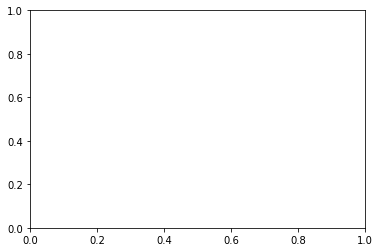

In [20]:
# TUNERS
folder = './IO_YO/TM_NMF_6/'
models = ['NMF_TFIDF_FR', 'NMF_TFIDF_KL', 'NMF_TF_FR', 'NMF_TF_KL']
max_dfs = [120, 90, 70]
min_dfs = [1, 2]

# EXECUTE, ONE PLOT DISPLAYS 4 MODELS ON TOP OF EACH OTHER
for max_df in max_dfs:
    for min_df in min_dfs:
        
        big_cosine_list = []
        big_coherence_list = []
        big_exclusivity_list = []
        big_cosine_labels = []     
        big_coherence_labels = []   
        big_exclusivity_labels = [] 
        
        for model in models:
        
            elbow_cosine_list = []     
            elbow_coherence_list = []   
            elbow_exclusivity_list = [] 

            for n_topics in range(1, 41):
            
                print('in current iteration, model=' + model + ', min_df=' + str(min_df) + ', max_df=' + str(max_df) + ', number of topics=' + str(n_topics))
                path = folder + model + '_min' + str(min_df) + '_max' + str(max_df) + '_k' + str(n_topics)

                work_table = extract_data(load_data(path))
                terms_only, terms_with_weight = extract_topics(path) 
                
                # CALCULATE COSINE SIMILARITY
                if n_topics >= 2 :
                    average_cosine = calculate_cosine(create_clusters(work_table))    
                    elbow_cosine_list.append(average_cosine)

                # CALCULATE COHERENCE  
                average_coherence = calculate_coherence(work_table, terms_only)
                elbow_coherence_list.append(average_coherence)
    
                # CALCULATE EXCLUSIVITY
                average_exclusivity = calculate_exclusivity(terms_with_weight)
                elbow_exclusivity_list.append(average_exclusivity)    

            big_cosine_list.append(elbow_cosine_list)
            big_coherence_list.append(elbow_coherence_list)
            big_exclusivity_list.append(elbow_exclusivity_list)   
            big_cosine_labels.append(model)
            big_coherence_labels.append(model)
            big_exclusivity_labels.append(model)            
        
        # VISUALIZE COHERENCE
        for j in range(0, len(big_coherence_list)):
            x = numpy.arange(1, 40)
            plt.plot(x, big_coherence_list[j], label = big_coherence_labels[j])
        plt.title('coherence (min_df=' + str(min_df) + ', max_df=' + str(max_df) + ')')
        plt.legend(loc='best')
        plt.show()  

        # VISUALIZE EXCLUSIVITY
        for k in range(0, len(big_exclusivity_list)):
            x = numpy.arange(1, 40)
            plt.plot(x, big_exclusivity_list[k], label = big_exclusivity_labels[k])
        plt.title('exclusivity (min_df=' + str(min_df) + ', max_df=' + str(max_df) + ')')
        plt.legend(loc='best')
        plt.show()
        
        # VISUALIZE COSINE SIMILARITY           
        for i in range(0, len(big_cosine_list)):
            x = numpy.arange(2, 40)
            plt.plot(x, big_cosine_list[i], label = big_cosine_labels[i])
        plt.title('cosine sim. (min_df=' + str(min_df) + ', max_df=' + str(max_df) + ')')
        plt.legend(loc='best')
        plt.show() 
        
        #print('process for ' + path + ' is done')    